In [1]:
%pip install imblearn


[notice] A new release of pip is available: 23.3.2 -> 24.0


[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [5]:
df = pd.read_csv('../stroke_data_cleaned.csv')

In [6]:
df2 = df[df.columns[1:12]]
gender_labels = {'Male':0,'Female':1}
ever_married_labels = {'Yes':0,'No':1}
work_type_labels = {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}
residence_type_labels = {'Urban' : 0, 'Rural' : 1}
smoking_status_labels = {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}

df2['gender'] = df2['gender'].map(gender_labels)
df2['ever_married'] = df2['ever_married'].map(ever_married_labels)
df2['work_type'] = df2['work_type'].map(work_type_labels)
df2['Residence_type'] = df2['Residence_type'].map(residence_type_labels)
df2['smoking_status'] = df2['smoking_status'].map(smoking_status_labels)

C:\Users\harsh\AppData\Local\Temp/ipykernel_19292/2893403509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = df2['gender'].map(gender_labels)
C:\Users\harsh\AppData\Local\Temp/ipykernel_19292/2893403509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ever_married'] = df2['ever_married'].map(ever_married_labels)
C:\Users\harsh\AppData\Local\Temp/ipykernel_19292/2893403509.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [7]:
X = df2.drop(columns='stroke').values
y = df2['stroke'].values

X = MinMaxScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [8]:
sm = SMOTE(random_state=2)

x_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [9]:
# Best models from each classifier

dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth = 20,
    min_samples_leaf = 5,
    random_state = 35
)

knn = KNeighborsClassifier(
    n_neighbors = 7,
    metric = 'euclidean',
    weights = 'distance'
)

lr = LogisticRegression(
    C = 0.25,
    penalty = 'l2'
)

rf = RandomForestClassifier(
    n_estimators = 200,
    criterion = 'entropy'
)

svc = SVC(
    C = 1,
    kernel = 'rbf'
)

xgb = XGBClassifier(
    objective = 'binary:logistic',
                learning_rate = 0.2,
                max_depth = 6,
                gamma = 0.0,
                scoring = 'roc_auc',
                eval_metric = 'error',
                cv = 10
)

In [10]:
dt_model = dt.fit(x_train_res,y_train_res)
knn_model = knn.fit(x_train_res,y_train_res)
lr_model = lr.fit(x_train_res,y_train_res)
rf_model = rf.fit(x_train_res,y_train_res)
svc_model = svc.fit(x_train_res,y_train_res)
xgb_model = xgb.fit(x_train_res,y_train_res)

dt_pred = dt_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

c:\Users\harsh\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:160: UserWarning: [18:44:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv", "scoring" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
# Make dataframes to plot

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svc_df = pd.DataFrame(data=[f1_score(y_test,svc_pred),accuracy_score(y_test, svc_pred), recall_score(y_test, svc_pred),
                   precision_score(y_test, svc_pred), roc_auc_score(y_test, svc_pred)], 
             columns=['Support Vector Machine (SVC) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,lr_pred),accuracy_score(y_test, lr_pred), recall_score(y_test, lr_pred),
                   precision_score(y_test, lr_pred), roc_auc_score(y_test, lr_pred)], 
             columns=['Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

knn_df = pd.DataFrame(data=[f1_score(y_test,knn_pred),accuracy_score(y_test, knn_pred), recall_score(y_test, knn_pred),
                   precision_score(y_test, knn_pred), roc_auc_score(y_test, knn_pred)], 
             columns=['KNN Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

dt_df = pd.DataFrame(data=[f1_score(y_test,dt_pred),accuracy_score(y_test, dt_pred), recall_score(y_test, dt_pred),
                   precision_score(y_test, dt_pred), roc_auc_score(y_test, dt_pred)], 
             columns=['Decision Tree Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xgb_df = pd.DataFrame(data=[f1_score(y_test,xgb_pred),accuracy_score(y_test, xgb_pred), recall_score(y_test, xgb_pred),
                   precision_score(y_test, xgb_pred), roc_auc_score(y_test, xgb_pred)], 
             columns=['XGBoost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

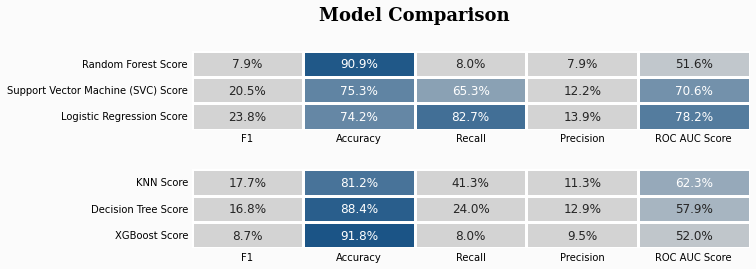

In [24]:
df_models1 = round(pd.concat([rf_df,svc_df,lr_df], axis=1),3)
df_models2 = round(pd.concat([knn_df,dt_df,xgb_df],axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models1.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(2,-1.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif',horizontalalignment='center')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax1 = fig.add_subplot(gs[1, :])

sns.heatmap(df_models2.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax1,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax1.set_facecolor(background_color) 

ax1.tick_params(axis=u'both', which=u'both',length=0)


plt.show()